# Programmation Linéaire
Dans ce notebook, on implémente une détection de fraude à l'aide de CPLEX
## Importation

In [29]:
from docplex.mp.model import Model
from docplex.mp.environment import Environment
import numpy as np
from random import randrange

## Importation du fichier

In [30]:
def fillUntilIndex(val, ind):
    while(len(val) < int(ind)+1):
        val.append(0)

In [31]:
xdata = {}

maxCount = 100
count = 0
with open('../data_in/Amazon0302.txt','r') as file:
    for line in file:
        count = count +1
        if (count > maxCount):
            break
        a,b = line.split(" ")
        try:
            xdata[(int(a),int(b))] = randrange(5)
        except Exception as e:
            print(e)

In [32]:
max = -1
for (a,b) in xdata:
    if (a > max):
        max = a
    if (b > max):
        max = b
print(max)

ydata = [e for e in range(0,max+1)]

290


## Implémentation du code

In [33]:
V_NB = 3
E_NB = 3

V_Range = range(0,V_NB)
E_Range = range(0,E_NB)

vals = {}
vals[(0,2)] = 10
vals[(2,1)] = 20
vals[(1,0)] = 30

valsy = [e for e in V_Range]

In [34]:
#Graphe étoile
V_NB = 6
E_NB = 11

V_Range = range(0,V_NB)
E_Range = range(0,E_NB)

vals = {}
vals[(0,1)] = 10
vals[(0,2)] = 20
vals[(0,3)] = 30
vals[(0,4)] = 40
vals[(1,2)] = 50
vals[(1,3)] = 60
vals[(1,4)] = 70
vals[(2,3)] = 80
vals[(2,4)] = 90
vals[(2,5)] = 100
vals[(3,4)] = 110

valsy = [e for e in V_Range]

In [35]:
vals = xdata
valsy = ydata

In [36]:
def a(i):
    return "y_"+i

m = Model(name='FraudGraph')
x = m.continuous_var_dict(vals,lb=0,name='x')
y = m.continuous_var_list(valsy,lb=0, name='y')

c1 = m.add_constraints(x[(i,j)] <=y[i] for (i,j) in x)
c2 = m.add_constraints(x[(i,j)] <=y[j] for (i,j) in x)
c3 = m.add_constraint( np.sum(y) <= 1)

m.maximize( m.sum(x[(i,j)] for (i,j) in x))

m.print_information()
m.solve()
m.print_solution(print_zeros=False)

Model: FraudGraph
 - number of variables: 391
   - binary=0, integer=0, continuous=391
 - number of constraints: 201
   - linear=201
 - parameters: defaults
 - objective: maximize
 - problem type is: LP
objective: 2.889
  x_0_1=0.056
  x_0_2=0.056
  x_0_4=0.056
  x_0_5=0.056
  x_1_0=0.056
  x_1_2=0.056
  x_1_4=0.056
  x_1_5=0.056
  x_2_0=0.056
  x_2_11=0.056
  x_2_13=0.056
  x_4_7=0.056
  x_4_16=0.056
  x_4_17=0.056
  x_4_19=0.056
  x_5_6=0.056
  x_5_7=0.056
  x_5_8=0.056
  x_5_9=0.056
  x_5_10=0.056
  x_6_5=0.056
  x_6_7=0.056
  x_6_8=0.056
  x_6_9=0.056
  x_6_20=0.056
  x_7_5=0.056
  x_7_8=0.056
  x_7_9=0.056
  x_7_30=0.056
  x_8_13=0.056
  x_8_23=0.056
  x_10_5=0.056
  x_10_7=0.056
  x_11_6=0.056
  x_11_9=0.056
  x_11_20=0.056
  x_13_20=0.056
  x_13_23=0.056
  x_16_4=0.056
  x_16_7=0.056
  x_16_19=0.056
  x_17_6=0.056
  x_17_7=0.056
  x_17_8=0.056
  x_17_30=0.056
  x_19_4=0.056
  x_19_16=0.056
  x_20_6=0.056
  x_20_7=0.056
  x_20_8=0.056
  x_20_23=0.056
  x_20_30=0.056
  y_0=0.056
 

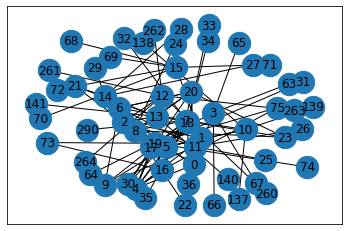

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
nodes = [e for e in vals]

G.add_edges_from(nodes)
black_edges = [edge for edge in G.edges()]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G,k=0.5, iterations=20)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()